In [4]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
(x_train, y_train), (x_test, y_test) = (train_images, train_labels), (test_images, test_labels)

class_names = ['0','1','2','3','4','5','6','7','8','9']
NUM_CLASSES = 10

In [10]:
y_train.shape
y_train[10]

3

In [12]:
from tensorflow.keras.utils import to_categorical

x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

x_train = x_train/255.
x_test = x_test/255.

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)
print("converted y.shape = ", y_train.shape)

converted y.shape =  (60000, 10)


In [13]:
y_train[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [16]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

# import os
# os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
# from keras.utils import plot_model
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

In [17]:
conv2d_1 = model.layers[0]
weights = conv2d_1.get_weights()
w = weights[0]
b = weights[1]
print(w.shape, b.shape)
filter_id = 0
kernel = w[:,:,:,filter_id:filter_id+1]
kernel = kernel.reshape(3,3)
print(kernel)

(3, 3, 1, 32) (32,)
[[-0.08760071 -0.06907376  0.0582044 ]
 [-0.12806888  0.06904279  0.01781847]
 [-0.11967925 -0.08082762  0.13073449]]


In [19]:
model.compile(optimizer='sgd',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0313 - accuracy: 0.9903
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0285 - accuracy: 0.9913
Epoch 3/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0265 - accuracy: 0.9918
Epoch 4/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0244 - accuracy: 0.9924
Epoch 5/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0226 - accuracy: 0.9932
Epoch 6/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0218 - accuracy: 0.9937
Epoch 7/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0196 - accuracy: 0.9941
Epoch 8/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0186 - accuracy: 0.9946
Epoch 9/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0171 - accuracy: 0.9949
Epoch 10/100
1875/1875 [==============================] - 5s 3ms/step - l

1875/1875 [==============================] - 5s 3ms/step - loss: 1.8765e-04 - accuracy: 1.0000
Epoch 79/100
1875/1875 [==============================] - 5s 3ms/step - loss: 1.8114e-04 - accuracy: 1.0000
Epoch 80/100
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7935e-04 - accuracy: 1.0000
Epoch 81/100
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7232e-04 - accuracy: 1.0000
Epoch 82/100
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6880e-04 - accuracy: 1.0000
Epoch 83/100
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6649e-04 - accuracy: 1.0000
Epoch 84/100
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6422e-04 - accuracy: 1.0000
Epoch 85/100
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5795e-04 - accuracy: 1.0000
Epoch 86/100
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5483e-04 - accuracy: 1.0000
Epoch 87/100
1875/1875 [=================

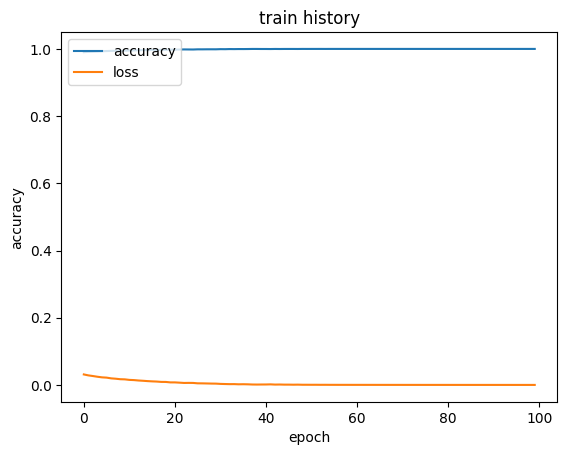

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('train history')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

In [21]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0417 - accuracy: 0.9918


In [22]:
preds = model.predict(x_train[0:1])
print(preds[0])
print(preds[0].sum())

1/1 [==============================] - 0s 280ms/step
[7.1571464e-26 5.5468123e-21 1.1951480e-27 5.3755043e-04 1.0467848e-22
 9.9946243e-01 1.5427373e-25 4.4277543e-22 4.9221542e-15 2.4692527e-15]
1.0


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6488 - accuracy: 0.8375
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3336 - accuracy: 0.9074
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2841 - accuracy: 0.9197
Epoch 

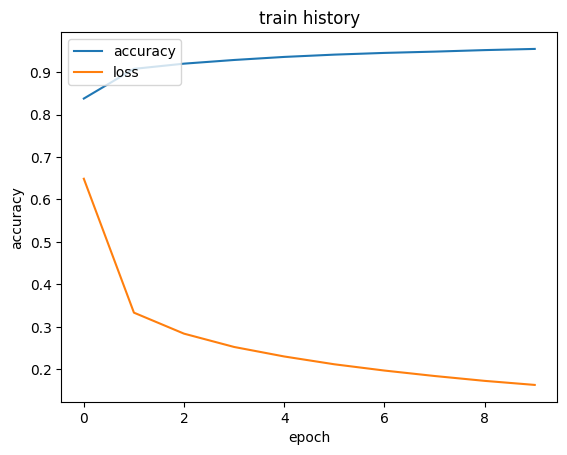

313/313 [==============================] - 1s 2ms/step - loss: 0.1600 - accuracy: 0.9543


In [23]:
modelfc = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28,1)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

modelfc.summary()
modelfc.compile(optimizer = 'sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
history = modelfc.fit(x_train, y_train, epochs=10)

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('train history')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

loss, accuracy = modelfc.evaluate(x_test, y_test)

In [ ]:
from tensorflow.keras import backend as K

inp = model.input
outputs = [layer.output for layer in model.layers]
functors = [K.function([inp, keras.Input(shape=())], [out]) for out in outputs]

layer_id = 0
filter_id = 0
layerfn = functors[layer_id]
learning_phase = 0
out = layerfn([x_train[0:2], learning_phase])

print('out[0].shape =', out[0].shape)
result = out[0][0][:,:,filter_id:filter_id+1]

print('model result shape (with channel) = ', result.shape)

result_as_img = result.reshape((result.shape[0], result.shape[1]))
print(result_as_img.shape)

plt.imshow(x_train[0].reshape((28,28)), cmap=plt.cm.binary)
plt.show()
x_pos = 10
y_pos = 5
img3x3 = x_train[0][y_pos:y_pos+3, x_pos:x_pos+3, :].reshape((3,3))
print(img3x3)

In [ ]:
conv2d_l = model.layers[0]
weights = conv2d_l.get_weights()
w = weights[0]
b = weights[1]
print(w.shape, b.shape)
filter_id = 0
kernel = w[:,:,:,filter_id:filter_id+1]
kernel = kernel.reshape(3,3)
print(kernel)
bias = b[0]
print(bias)
print(img3x3)

In [ ]:
y = (kernel*img3x3).sum()+bias
if y < 0:
  y = 0
print(y)
print(result[y_pos][x_pos])